# **Ejemplo 1**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


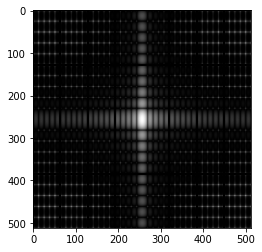

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# l = 512
# img = np.zeros((l, l))
# for i in range(20):
#   for j in range(40):
#     img[256-10+i][256-20+j] = 1

img = np.zeros((512, 512))
img[256-10:256+10, 256-20:256+20] = 1
img = np.float32(img)

plt.imshow(img, cmap='gray')

dft = cv2.dft(img, flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitud = 20*np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:,:,1]))
magnitud = abs(magnitud**2)

plt.imshow(magnitud, cmap='gray')



# **Ejemplo 2**


*   Un cuadrado
*   Un rectángulo vertical 
*   Un rectángulo horizontal



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


<Figure size 432x288 with 0 Axes>

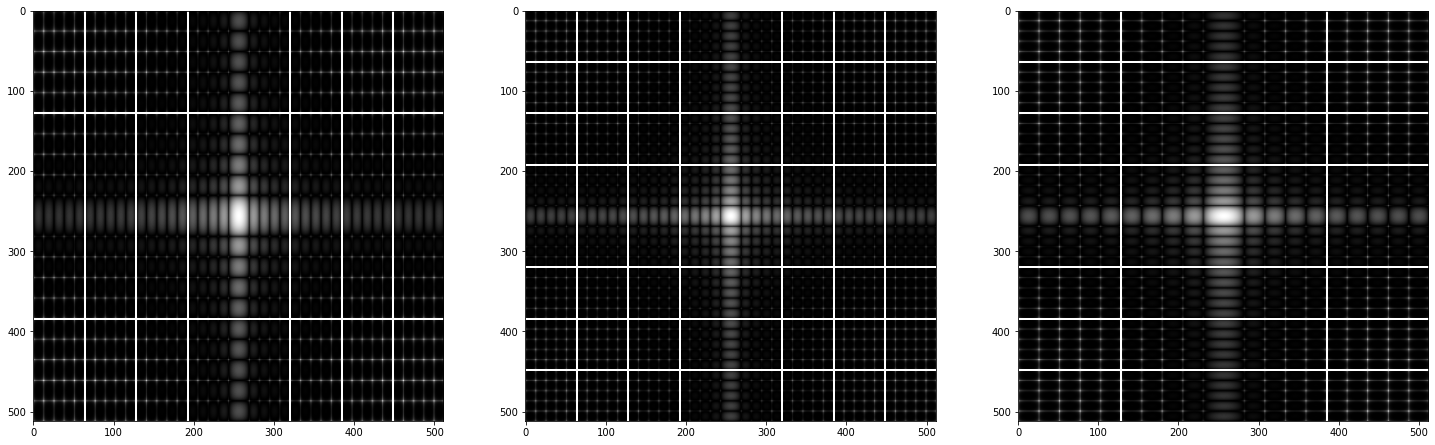

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img1 = np.zeros((512, 512))
img2 = np.zeros((512, 512))
img3 = np.zeros((512, 512))

img1[256-10:256+10, 256-20:256+20] = 1
img2[256-20:256+20, 256-20:256+20] = 1
img3[256-20:256+20, 256-10:256+10] = 1
imgs = [img1, img2, img3]
fft_imgs = []
#plt.imshow(img, cmap='gray')

for img in imgs:
  dft = cv2.dft(img, flags=cv2.DFT_COMPLEX_OUTPUT)
  dft_shift = np.fft.fftshift(dft)
  magnitud = 20*np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:,:,1]))
  magnitud = abs(magnitud**2)
  fft_imgs.append(magnitud)

#plt.imshow(magnitud, cmap='gray')
plt.figure()
f, axarr = plt.subplots(1,3)
f.set_size_inches(25, 20)


for i in range(3):
  axarr[i].imshow(fft_imgs[i], cmap='gray')
  

# **Ejemplo 3**


*   Imagen en escala de grises
*   Imagen a color



<Figure size 432x288 with 0 Axes>

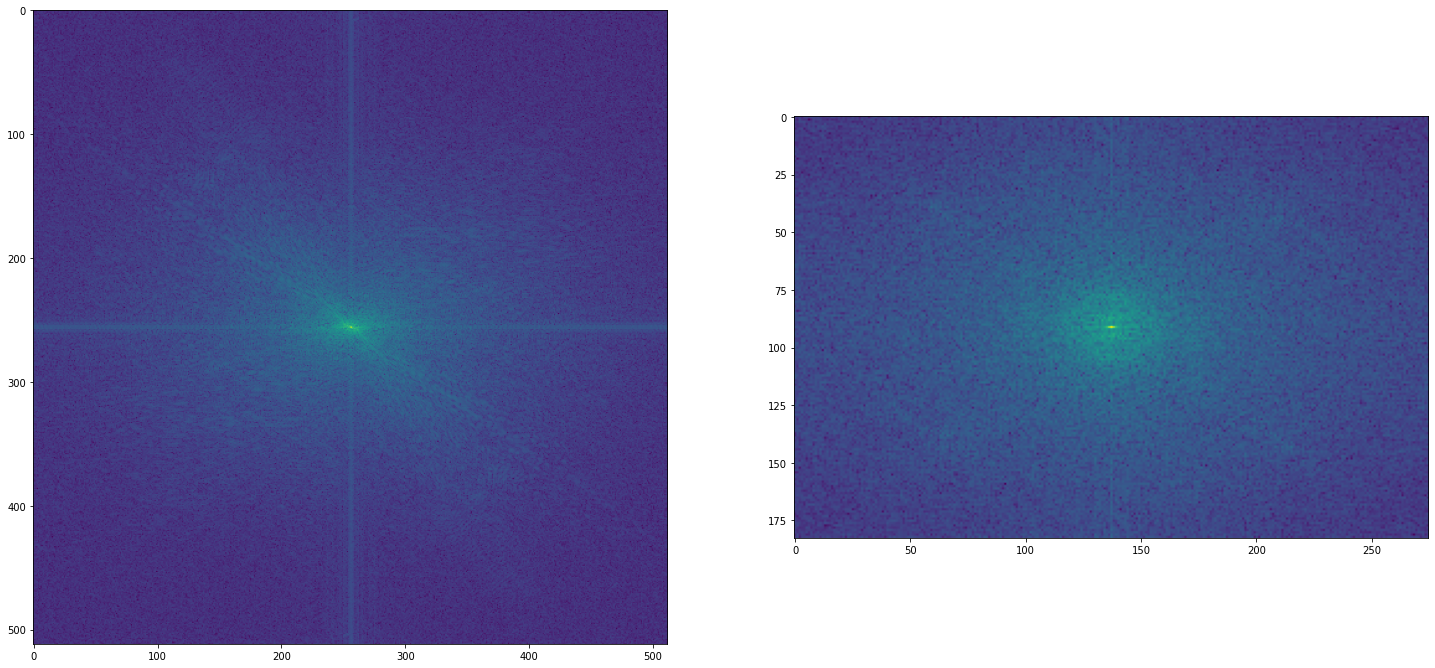

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

img1 = np.float32(cv2.imread('Lenna.png', 0))
img2 = np.float32(cv2.imread('frutsi.jpg', 0))

imgs = [img1, img2]
fft_imgs = []
# plt.imshow(img1, cmap='gray')
# plt.imshow(img2, cmap='gray')

for img in imgs:  
  dft = cv2.dft(img, flags=cv2.DFT_COMPLEX_OUTPUT)
  dft_shift = np.fft.fftshift(dft)
  magnitud = 20*np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:,:,1]))
  magnitud = abs(magnitud**2)
  fft_imgs.append(magnitud)

#plt.imshow(magnitud, cmap='gray')
plt.figure()
f, axarr = plt.subplots(1,2)
f.set_size_inches(25, 20)

axarr[0].imshow(fft_imgs[0])
axarr[1].imshow(fft_imgs[1])

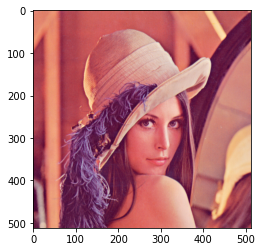

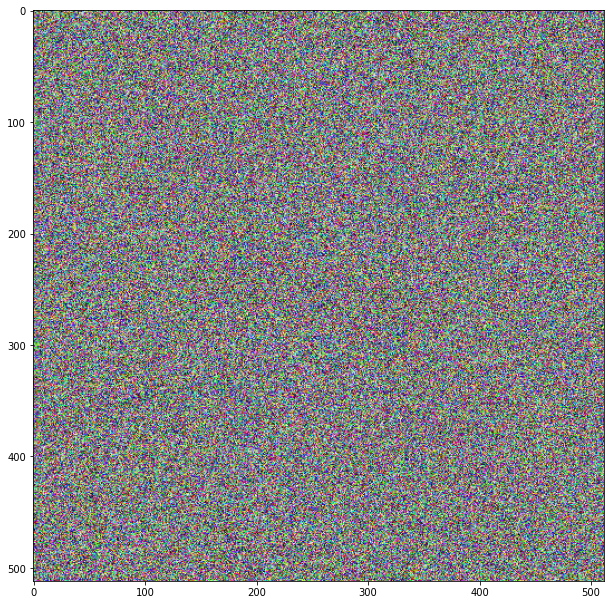

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img  =  cv2.imread('Lenna.png')
img1 = np.float32(cv2.imread('Lenna.png'))



B, G, R = cv2.split(img1)

bgr = [B, G, R]
fft_bgr = []
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

for c in bgr:  
  dft = cv2.dft(c, flags=cv2.DFT_COMPLEX_OUTPUT)
  dft_shift = np.fft.fftshift(dft)
  magnitud = 50*np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:,:,1]))
  magnitud = abs(magnitud**2)
  fft_imgs.append(magnitud)
  fft_bgr.append(magnitud)

fft_img = cv2.merge(fft_bgr)
fft_img = fft_img.astype('uint8')
#plt.imshow(fft_img)
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
plt.imshow(cv2.cvtColor(fft_img, cv2.COLOR_BGR2RGB))


# **Ejemplo 4**
Realiza un Programa en Python que calcule la convolución con la función conv2()
de una imagen de entrada f(n,m) y una función kernel h(n,m) para producir un filtro de media

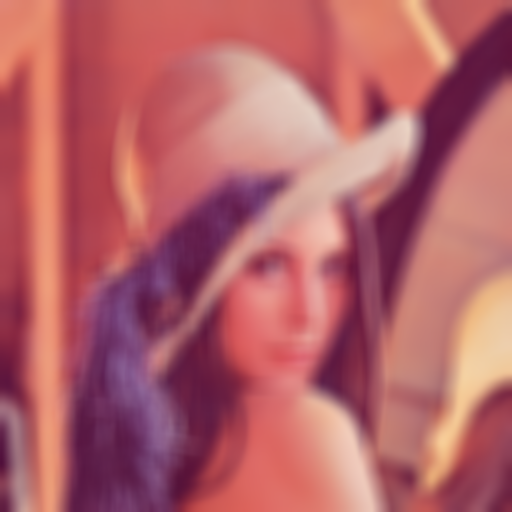

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import cv2
from google.colab.patches import cv2_imshow

k = 20
h = np.ones((k,k))/k**2

img = np.float32(cv2.imread('Lenna.png'))

conv_img = cv2.filter2D(img,-1,h)
conv_img = conv_img.astype('uint8')
#conv2_img = signal.convolve2d(img, h)
cv2_imshow(conv_img) 
#plt.imshow(conv_img)



# **Ejemplo 5**
Del ejemplo anterior, programa en Python tu propia función de convolución y
compara la imagen de salida resultante con una medida de distancia (ejemplo
Euclideana)

In [ ]:
import cv2
import numpy as np
from scipy import signal
from google.colab.patches import cv2_imshow

#### Custom #######################
def convolution2d(A, K):
	K = np.flipud(np.fliplr(K))
	m, _ = K.shape
	y, x = A.shape
	MO = np.copy(A)  #Se crea la matriz de operacion a partir de la matriz A

	xo = x + (m-1)*2  #Dimensiones de la matriz de operacion 
	yo = y + (m-1)*2 

	for i in range(int((xo - x)/2)):		#Se añaden las columnas y filas de 0, para terminar de crear la matriz de operacion
			MO = np.insert(MO, 0, 0, axis=0)
			MO = np.insert(MO, MO.shape[0], 0, axis=0)
	for i in range(int((xo - x)/2)):
			MO = np.insert(MO, 0, 0, axis=1)
			MO = np.insert(MO, MO.shape[1], 0, axis=1)
	# print("Operation Matrix: ")
	# print(MO)

	y = y + m - 1 		#Dimensiones de la matriz de convolucion
	x = x + m - 1


	C = np.zeros((y,x))		#Se crea la matriz de convolucion con zeros
	for i in range(y):
		for j in range(x):

			#print(MO[i:i+m, j:j+m])

			C[i][j] = np.sum(MO[i:i+m, j:j+m]*K) 		#Se añaden los valores de la matriz de convolucion multiplicando y sumando la multiplicacion de submatrices por el kernel
			#print(C)
	return C

K = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
A = np.array([[3, 0, 1, 5, 0],
              [2, 6, 2, 4, 3],
              [2, 4, 1, 0, 6],
              [3, 0, 1, 5, 0],
              [2, 6, 2, 4, 3]])

print("Matrix: ")
print(A)
print("Kernel: ")
print(K)
print("Convolution: ")
print(convolution2d(A, K).astype("int"))


###### Scipy #######
print("------------Scipy---------------")
C = signal.convolve2d(A, K)
print(C)

Matrix: 
[[3 0 1 5 0]
 [2 6 2 4 3]
 [2 4 1 0 6]
 [3 0 1 5 0]
 [2 6 2 4 3]]
Kernel: 
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
Convolution: 
[[  3   0  -2   5  -1  -5   0]
 [  8   6  -4   8  -1 -14  -3]
 [  9  16  -3  -3   6 -13 -12]
 [  9  14  -4  -5  10  -9 -15]
 [ 10  10  -5   4   4 -14  -9]
 [  7  12  -2   1   1 -13  -6]
 [  2   6   0  -2   1  -4  -3]]
------------Scipy---------------
[[  3   0  -2   5  -1  -5   0]
 [  8   6  -4   8  -1 -14  -3]
 [  9  16  -3  -3   6 -13 -12]
 [  9  14  -4  -5  10  -9 -15]
 [ 10  10  -5   4   4 -14  -9]
 [  7  12  -2   1   1 -13  -6]
 [  2   6   0  -2   1  -4  -3]]


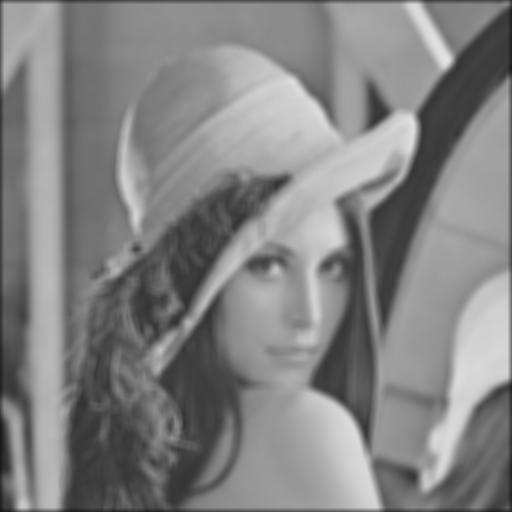

Delta Image (img - convolved image)


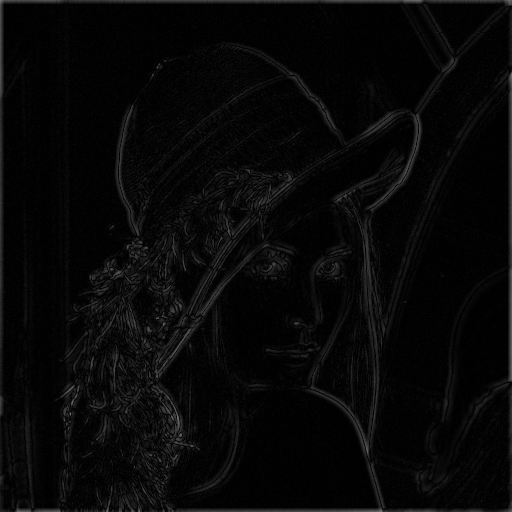

In [ ]:
img = np.float32(cv2.imread('Lenna.png', 0))
K = np.array([[1/9, 1/9, 1/9], [1/9,1/9, 1/9], [1/9, 1/9, 1/9]])
n = 9
K = np.ones((n,n))*(1/n**2)   #Gaussian Kernel

C = convolution2d(img, K).astype("uint8")
C = C[C.shape[0]//2 - img.shape[0]//2:C.shape[0]//2 + img.shape[0]//2,C.shape[1]//2 - img.shape[1]//2:C.shape[1]//2 + img.shape[1]//2]
cv2_imshow(C)

d_img = abs(img - C)  #como es 1 channel puede ser cualquier distancia, euclidiana, manhattan o chessboard
print("Delta Image (img - convolved image)")
cv2_imshow(d_img)
# d_B, d_G, d_R = cv2.split(d_img)
# d_B, d_G, d_R = d_B.astype(int), d_G.astype(int), d_R.astype(int)

# De = (d_B**2 + d_G**2 + d_R**2)**0.5                    #Euclidian
# #De = np.around((De*255)/441.673)   #Scale 0-255
# #De = np.around(De/3)
# D4 = abs(d_B) + abs(d_G) + abs(d_R)                     # Manhattan
# #D4 = np.around(D4/3)  #/3 for scale 0-255
# D8 = np.maximum.reduce([abs(d_B), abs(d_G), abs(d_R)])  #Chessboard

# plt.figure()
# f, axarr = plt.subplots(1,3)
# f.set_size_inches(25, 20)
# # axarr[0].imshow(De, cmap='gray', vmin=0, vmax=255)
# # axarr[1].imshow(D4, cmap='gray', vmin=0, vmax=255)
# # axarr[2].imshow(D8, cmap='gray', vmin=0, vmax=255)

# axarr[0].imshow(De, cmap='gray', vmin=0, vmax=765)
# axarr[1].imshow(D4, cmap='gray', vmin=0, vmax=765)
# axarr[2].imshow(D8, cmap='gray', vmin=0, vmax=765)

# **Ejemplo 6**
Utiliza las funcion fft2() e ifft2() para calcular la transformada y transformada inversa de Fourier

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


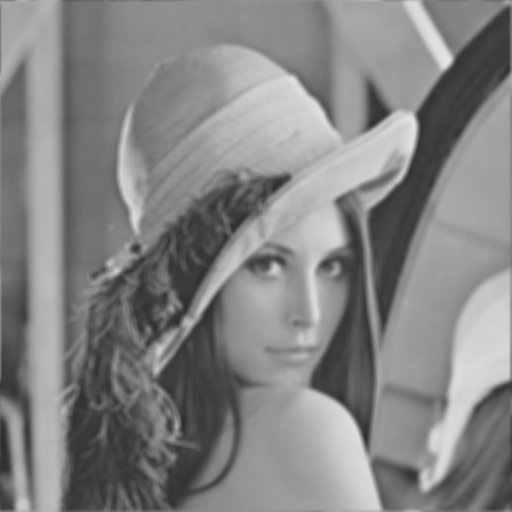

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import cv2
from google.colab.patches import cv2_imshow

img = np.float32(cv2.imread('Lenna.png', 0))


k = 6
h = np.ones((k,k))/k**2

H = np.zeros_like(img)
#row, col = img.shape()
H[256-int(k/2):256+ int(k/2), 256-int(k/2):256+int(k/2)] = 1/k**2

#print(h)

# dft = cv2.dft(img, flags=cv2.DFT_COMPLEX_OUTPUT)
# dft_shift = np.fft.fftshift(dft)
# fft_img = cv2.magnitude(dft_shift[:, :, 0], dft_shift[:,:,1])

fft_img = np.fft.fft2(img)
#fft_img = np.fft.fftshift(fft_img)

H = np.fft.fft2(H)
#H = np.fft.fftshift(H)

ifft = np.fft.ifft2(fft_img*H)
ifft  = np.fft.fftshift(ifft)
#cv2_imshow(fft_img)
cv2_imshow(ifft)





# **Ejemplo 7**
Realiza un programa en python con la función correlate2D() y el paquete signal de scipy que aplique
la correlación cruzada de dos imágenes, donde h(x,y), es una región de interés de la imagen original f(x,y).

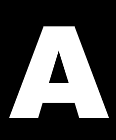

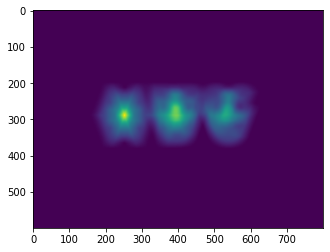

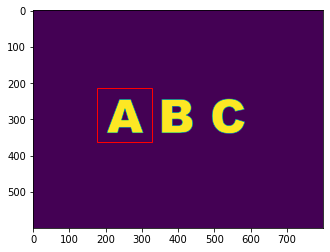

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.patches as patches

ABC = np.float32(cv2.imread("ABC.png", 0))
A = ABC[220:360, 195:311]

#cv2_imshow(ABC)
cv2_imshow(A)

corr = signal.correlate2d(ABC, A, mode="same")
fig = plt.figure()
plt.imshow(corr, cmap="viridis")

maxv = np.argmax(corr)
x = maxv%800   # coordenada x
y = maxv//800  # coordenada y

# print(maxv)
# print(x, y)  #coordenadas
# print(corr.shape)
fig, ax = plt.subplots(1)
ax.imshow(ABC)
l = 150
rect = patches.Rectangle((x - l//2 , y - l//2), l, l, linewidth=1,    #un cuadrado en el centro del valor maximo
                         edgecolor='r', facecolor="none")
ax.add_patch(rect)
plt.show()

